In [1]:
# Import of Important Libraries
import sys, os, time, importlib, glob, pdb
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from matplotlib import rc
from os import listdir
import OutflowsCGMInteractionTools.AnalysisTools as l
import OutflowsCGMInteractionTools.HalosData as HD
from astropy import units as u
from astropy import constants as const
from math import nan, isnan
G=const.G.to('km^3/M_sun*s^2')
###############################################################
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)
#fig = plt.gcf()

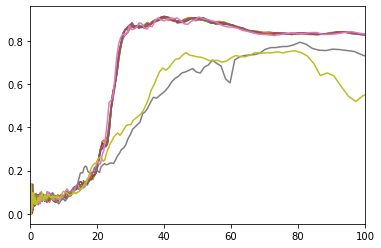

In [2]:
Data1= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/profiler_m12i_md_7100_z0.0000.npz",allow_pickle=True)
Data2= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/profiler_m12i_md_7100_z0.0002.npz",allow_pickle=True)
Data3= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/profiler_m12i_md_7100_z0.0006.npz",allow_pickle=True)
Data4= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/profiler_m12i_md_7100_z0.0010.npz",allow_pickle=True)
Data5= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/profiler_m12i_md_7100_z0.0014.npz",allow_pickle=True)
Data6= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/profiler_m12i_md_7100_z0.0016.npz",allow_pickle=True)
Data7= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/profiler_m12i_md_7100_z0.0032.npz",allow_pickle=True)
Data8= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/profiler_m12i_md_7100_z0.2266.npz",allow_pickle=True)
Data9= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/profiler_m12i_md_7100_z0.2510.npz",allow_pickle=True)

#for key in Data:
#    print(key)

plt.plot(Data1['rs_midbins'],Data1['subsonic_fraction_MW'])
plt.plot(Data2['rs_midbins'],Data2['subsonic_fraction_MW'])
plt.plot(Data3['rs_midbins'],Data3['subsonic_fraction_MW'])
plt.plot(Data4['rs_midbins'],Data4['subsonic_fraction_MW'])
plt.plot(Data5['rs_midbins'],Data5['subsonic_fraction_MW'])
plt.plot(Data6['rs_midbins'],Data6['subsonic_fraction_MW'])
plt.plot(Data7['rs_midbins'],Data7['subsonic_fraction_MW'])
plt.plot(Data8['rs_midbins'],Data8['subsonic_fraction_MW'])
plt.plot(Data9['rs_midbins'],Data9['subsonic_fraction_MW'])

plt.xlim([0,100])
plt.show()

In [3]:
def FindClosest(lst,K): 
    return lst[min(range(len(lst)),key=lambda i: abs(float(lst[i])-K))]
ListOfFiles=os.listdir("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/")
ListOfRedshiftsTheo=[]
for i in ListOfFiles:
    RedshiftTheo=i.replace("._profiler_m12i_md_7100_z","")
    RedshiftTheo=RedshiftTheo.replace("profiler_m12i_md_7100_z","")
    RedshiftTheo=RedshiftTheo.replace(".npz","")
    RedshiftTheo=float(RedshiftTheo)
    ListOfRedshiftsTheo.append("{:.4f}".format(RedshiftTheo))
def FindTheTotalMassWithinSpecificRadiusInSpecificRedShift(Redshift,Radius):
    ClosestRedshift=FindClosest(ListOfRedshiftsTheo,Redshift)
    Data= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/profiler_m12i_md_7100_z"+str(ClosestRedshift)+".npz",allow_pickle=True)
    ClosestR=FindClosest(Data['rs_midbins'],Radius)
    Index=np.where(Data['rs_midbins']==ClosestR)
    M=Data['massProfile0'][Index]+Data['massProfile1'][Index]+Data['massProfile2'][Index]+Data['massProfile4'][Index]
    return(M)

In [5]:
# Tracking from 242 to 276
# Tracking from z=1.25 to z=1.0
AllParticlesRmax=[]
AllParticlesRmin=[]
AllParticlesRedshiftinRmax=[]
AllParticlesRedshiftinRmin=[]
AllParticlesVinRmax=[]
AllParticlesVinRmin=[]
AllParticlesEIinRmax=[]
AllParticlesEIinRmin=[]
AllParticlesETotalInRmax=[]
AllParticlesETotalInRmin=[]

for i in range(0,1000):
    Redshifts=[]
    RAlongRedshifts=[]
    VAlongRedshifts=[]
    EIAlongRedshifts=[]
    for j in range (242,277):
        snapnumber=str(j)+".0.npz"
        SnapshotData= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/"+snapnumber,allow_pickle=True)
        Redshifts.append(SnapshotData['arr_0'][0])
        RAlongRedshifts.append(SnapshotData['arr_0'][4][i])
        VAlongRedshifts.append(SnapshotData['arr_0'][10][i])
        EIAlongRedshifts.append(SnapshotData['arr_0'][11][i])
    Redshifts=np.array(Redshifts)
    RAlongRedshifts=np.array(RAlongRedshifts)   
    VAlongRedshifts=np.array(VAlongRedshifts)
    EIAlongRedshifts=np.array(EIAlongRedshifts)
    
    Rmax=np.max(RAlongRedshifts)
    IndexOfRmax=np.where(RAlongRedshifts==Rmax)
    AllParticlesRmax.append(Rmax)
    AllParticlesRedshiftinRmax.append(Redshifts[IndexOfRmax])
    AllParticlesVinRmax.append(VAlongRedshifts[IndexOfRmax])
    AllParticlesEIinRmax.append(EIAlongRedshifts[IndexOfRmax])
    MInRmax=FindTheTotalMassWithinSpecificRadiusInSpecificRedShift(Redshifts[IndexOfRmax],Rmax)
    RmaxInUnitsOfkm=Rmax*u.kpc.to("km")
    EpInRmax=G.value*MInRmax/RmaxInUnitsOfkm
    if(EIAlongRedshifts[IndexOfRmax]!=None):
        EtotInRmax=0.5*(VAlongRedshifts[IndexOfRmax])**2+EpInRmax+EIAlongRedshifts[IndexOfRmax]
    else:
        EtotInRmax=0.5*(VAlongRedshifts[IndexOfRmax])**2+EpInRmax
    AllParticlesETotalInRmax.append(EtotInRmax)
    
    Rmin=np.min(RAlongRedshifts)
    IndexOfRmin=np.where(RAlongRedshifts==Rmin)
    AllParticlesRmin.append(Rmin)
    AllParticlesRedshiftinRmin.append(Redshifts[IndexOfRmin])
    AllParticlesVinRmin.append(VAlongRedshifts[IndexOfRmin])
    AllParticlesEIinRmin.append(EIAlongRedshifts[IndexOfRmin])
    MInRmin=FindTheTotalMassWithinSpecificRadiusInSpecificRedShift(Redshifts[IndexOfRmin],Rmin)
    RminInUnitsOfkm=Rmin*u.kpc.to("km")
    EpInRmin=G.value*MInRmin/RminInUnitsOfkm
    if(EIAlongRedshifts[IndexOfRmin]!=None):
        EtotInRmin=0.5*(VAlongRedshifts[IndexOfRmin])**2+EpInRmin+EIAlongRedshifts[IndexOfRmin]
    else:
        EtotInRmin=0.5*(VAlongRedshifts[IndexOfRmin])**2+EpInRmin
    AllParticlesETotalInRmin.append(EtotInRmin)
       
AllParticlesRmax=np.array(AllParticlesRmax)
AllParticlesRmin=np.array(AllParticlesRmin)
AllParticlesRedshiftinRmax=np.array(AllParticlesRedshiftinRmax)
AllParticlesRedshiftinRmin=np.array(AllParticlesRedshiftinRmin)
AllParticlesVinRmax=np.array(AllParticlesVinRmax)
AllParticlesVinRmin=np.array(AllParticlesVinRmin)
AllParticlesEIinRmax=np.array(AllParticlesEIinRmax)
AllParticlesEIinRmin=np.array(AllParticlesEIinRmin)
AllParticlesETotalInRmax=np.array(AllParticlesETotalInRmax)
AllParticlesETotalInRmin=np.array(AllParticlesETotalInRmin)

np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesRmax.npz",AllParticlesRmax,dtype=float)
np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesRmin.npz",AllParticlesRmin,dtype=float)
np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesRedshiftinRmax.npz",AllParticlesRedshiftinRmax,dtype=float)
np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesRedshiftinRmin.npz",AllParticlesRedshiftinRmin,dtype=float)
np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesETotalInRmax.npz",AllParticlesETotalInRmax,dtype=float)
np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesETotalInRmin.npz",AllParticlesETotalInRmin,dtype=float)

In [6]:
AllParticlesRedshiftinRmax= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesRedshiftinRmax.npz",allow_pickle=True)
AllParticlesRedshiftinRmin= np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesRedshiftinRmin.npz",allow_pickle=True)
AllParticlesRedshiftinRmax=AllParticlesRedshiftinRmax['arr_0']
AllParticlesRedshiftinRmin=AllParticlesRedshiftinRmin['arr_0']
AllParticlesRedshiftinRmaxArray=[]
AllParticlesRedshiftinRminArray=[]

AllParticlesRmax=np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesRmax.npz",allow_pickle=True)
AllParticlesRmin=np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesRmin.npz",allow_pickle=True)
AllParticlesRmax=AllParticlesRmax['arr_0']
AllParticlesRmin=AllParticlesRmin['arr_0']

AllParticlesETotalInRmax=np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesETotalInRmax.npz",allow_pickle=True)
AllParticlesETotalInRmin=np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/AllParticlesETotalInRmin.npz",allow_pickle=True)
AllParticlesETotalInRmax=AllParticlesETotalInRmax['arr_0']
AllParticlesETotalInRmin=AllParticlesETotalInRmin['arr_0']
AllParticlesETotalInRmaxArray=[]
AllParticlesETotalInRminArray=[]

FinalRedshiftsForRmax=[]
FinalRedshiftsForRmin=[]

FinalAvarageRmaxInAllRedshifts=[]
FinalAvarageRminInAllRedshifts=[]

FinalAvarageETotalInAllRedshiftsForRmax=[]
FinalAvarageETotalInAllRedshiftsForRmin=[]

for i in AllParticlesRedshiftinRmax:
    AllParticlesRedshiftinRmaxArray.append(i[0])
AllParticlesRedshiftinRmaxArray=np.array(AllParticlesRedshiftinRmaxArray)

for i in AllParticlesRedshiftinRmin:
    AllParticlesRedshiftinRminArray.append(i[0])
AllParticlesRedshiftinRminArray=np.array(AllParticlesRedshiftinRminArray)

for i in AllParticlesETotalInRmax:
    AllParticlesETotalInRmaxArray.append(i[0])
AllParticlesETotalInRmaxArray=np.array(AllParticlesETotalInRmaxArray)

for i in AllParticlesETotalInRmin:
    AllParticlesETotalInRminArray.append(i[0])
AllParticlesETotalInRminArray=np.array(AllParticlesETotalInRminArray)

while(len(AllParticlesRedshiftinRmaxArray)>0):
    MinRedshift=np.min(AllParticlesRedshiftinRmaxArray)
    FinalRedshiftsForRmax.append(MinRedshift)
    IndexOfMinRedshift=np.where(AllParticlesRedshiftinRmaxArray==MinRedshift)
    RmaxesSum=0
    ETotalForRmaxSum=0
    NumberOfParticles=len(IndexOfMinRedshift[0])
    for i in (IndexOfMinRedshift[0]):
        RmaxesSum=RmaxesSum+AllParticlesRmax[i]
        ETotalForRmaxSum=ETotalForRmaxSum+AllParticlesETotalInRmaxArray[i]
    RmaxAvargeInSpecificRedshift=RmaxesSum/NumberOfParticles
    ETotalAvargeInSpecificRedshiftForRmax=ETotalForRmaxSum/NumberOfParticles
    FinalAvarageRmaxInAllRedshifts.append(RmaxAvargeInSpecificRedshift)
    FinalAvarageETotalInAllRedshiftsForRmax.append(ETotalAvargeInSpecificRedshiftForRmax)
    
    AllParticlesRedshiftinRmaxArray=np.delete(AllParticlesRedshiftinRmaxArray,IndexOfMinRedshift[0])
    AllParticlesRmax=np.delete(AllParticlesRmax,IndexOfMinRedshift[0])
    AllParticlesETotalInRmaxArray=np.delete(AllParticlesETotalInRmaxArray,IndexOfMinRedshift[0])

while(len(AllParticlesRedshiftinRminArray)>0):
    MinRedshift=np.min(AllParticlesRedshiftinRminArray)
    FinalRedshiftsForRmin.append(MinRedshift)
    IndexOfMinRedshift=np.where(AllParticlesRedshiftinRminArray==MinRedshift)
    RminesSum=0
    ETotalForRminSum=0
    NumberOfParticles=len(IndexOfMinRedshift[0])
    for i in (IndexOfMinRedshift[0]):
        RminesSum=RminesSum+AllParticlesRmin[i]
        ETotalForRminSum=ETotalForRminSum+AllParticlesETotalInRminArray[i]
    RminAvargeInSpecificRedshift=RminesSum/NumberOfParticles
    ETotalAvargeInSpecificRedshiftForRmin=ETotalForRminSum/NumberOfParticles
    FinalAvarageRminInAllRedshifts.append(RminAvargeInSpecificRedshift)
    FinalAvarageETotalInAllRedshiftsForRmin.append(ETotalAvargeInSpecificRedshiftForRmin)

    AllParticlesRedshiftinRminArray=np.delete(AllParticlesRedshiftinRminArray,IndexOfMinRedshift[0])
    AllParticlesRmin=np.delete(AllParticlesRmin,IndexOfMinRedshift[0])
    AllParticlesETotalInRminArray=np.delete(AllParticlesETotalInRminArray,IndexOfMinRedshift[0])

FinalRedshiftsForRmax=np.array(FinalRedshiftsForRmax)
FinalRedshiftsForRmin=np.array(FinalRedshiftsForRmin)
FinalAvarageRmaxInAllRedshifts=np.array(FinalAvarageRmaxInAllRedshifts)
FinalAvarageRminInAllRedshifts=np.array(FinalAvarageRminInAllRedshifts)
FinalAvarageETotalInAllRedshiftsForRmax=np.array(FinalAvarageETotalInAllRedshiftsForRmax)
FinalAvarageETotalInAllRedshiftsForRmin=np.array(FinalAvarageETotalInAllRedshiftsForRmin)

#print(FinalRedshiftsForRmax)
#print(FinalRedshiftsForRmin)

#print(FinalAvarageRmaxInAllRedshifts)
#print(FinalAvarageRminInAllRedshifts)

#print(FinalAvarageETotalInAllRedshiftsForRmax)
#print(FinalAvarageETotalInAllRedshiftsForRmin)

np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/FinalRedshiftsForRmax.npz",FinalRedshiftsForRmax,dtype=float)
np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/FinalRedshiftsForRmin.npz",FinalRedshiftsForRmin,dtype=float)
np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/FinalAvarageRmaxInAllRedshifts.npz",FinalAvarageRmaxInAllRedshifts,dtype=float)
np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/FinalAvarageRminInAllRedshifts.npz",FinalAvarageRminInAllRedshifts,dtype=float)
np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/FinalAvarageETotalInAllRedshiftsForRmax.npz",FinalAvarageETotalInAllRedshiftsForRmax,dtype=float)
np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/FinalAvarageETotalInAllRedshiftsForRmin.npz",FinalAvarageETotalInAllRedshiftsForRmin,dtype=float)

In [7]:
FinalRedshiftsForRmax=np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/FinalRedshiftsForRmax.npz",allow_pickle=True)
FinalRedshiftsForRmax=FinalRedshiftsForRmax['arr_0']
FinalListOfRsonic=[]
for i in FinalRedshiftsForRmax:
    ClosestRedshift=FindClosest(ListOfRedshiftsTheo,i)
    TempLoad=np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/m12i_res7100Data/profiler_m12i_md_7100_z"+str(ClosestRedshift)+".npz",allow_pickle=True)
    Radiuses=TempLoad['rs_midbins'][0:258] # Only Radiuses Under 100 Kpc
    SubsonicFractionMW=TempLoad['subsonic_fraction_MW'][0:258]
    MaxSubsonicFractionMW=np.max(SubsonicFractionMW)
    MinSubsonicFractionMW=np.min(SubsonicFractionMW)
    AvarageSubsonicFractionMW=(MaxSubsonicFractionMW+MinSubsonicFractionMW)/2
    SubsonicFractionMWWithoutnanValues = [x for x in SubsonicFractionMW if isnan(x) == False]
    ClosestSubsonicToAvarage=FindClosest(SubsonicFractionMWWithoutnanValues,AvarageSubsonicFractionMW)
    IndexOfClosestSubsonicToAvarage=np.where(SubsonicFractionMW==ClosestSubsonicToAvarage)[0][0]
    ROfClosestSubsonicToAvarage=Radiuses[IndexOfClosestSubsonicToAvarage]
    FinalListOfRsonic.append(ROfClosestSubsonicToAvarage)
FinalListOfRsonic=np.array(FinalListOfRsonic)
np.savez_compressed("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/FinalListOfRsonic.npz",FinalListOfRsonic,dtype=float)

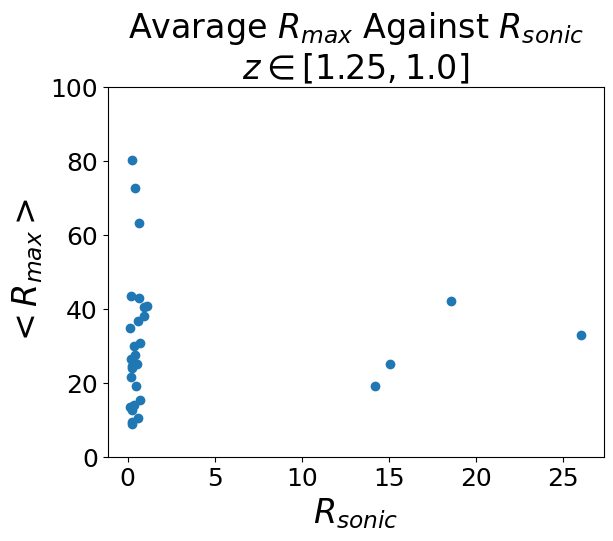

In [2]:
FinalAvarageRmaxInAllRedshifts=np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/FinalAvarageRmaxInAllRedshifts.npz",allow_pickle=True)
FinalAvarageRmaxInAllRedshifts=FinalAvarageRmaxInAllRedshifts['arr_0']
FinalListOfRsonic=np.load("/home1/08289/tg875885/radial_to_rotating_flows/Aharon/OutflowsCGM/TrackingData/TrackingFrom242To276/FinalListOfRsonic.npz",allow_pickle=True)
FinalListOfRsonic=FinalListOfRsonic['arr_0']
plt.title("Avarage "+r"$R_{max}$"+" Against "+r"$R_{sonic}$"+"\n"+r"$z\in[1.25,1.0]$",size=24)
plt.xlabel(r"$R_{sonic}$",size=24)
plt.ylabel(r"$<R_{max}>$",size=24)
plt.scatter(FinalListOfRsonic,FinalAvarageRmaxInAllRedshifts)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylim([0,100])
plt.savefig("Avarage Rmax Against Rsonic for z in [1.25,1.0].jpg",bbox_inches='tight')
plt.show()